In [19]:
import pandas as pd
import numpy as np
import os

In [20]:
os.chdir('C:\\Users\\skv\\Downloads\\Session2')

In [21]:
df=pd.read_excel('purchase.xlsx')

In [22]:
df.head()

,Products,Prod_id,Cust_id,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Customer_Segment
0,COPIERS AND FAX,Prod_16,Cust_1088,10909.641,40,2616.46,22.00,0.57,HOME OFFICE
1,COPIERS AND FAX,Prod_16,Cust_1820,10607.641,27,2977.36,23.69,0.56,CORPORATE
2,PAPER,Prod_6,Cust_1659,754.641,13,29.80,8.90,0.37,SMALL BUSINESS
3,PAPER,Prod_6,Cust_622,572.641,22,92.78,10.99,0.39,SMALL BUSINESS
4,OFFICE MACHINES,Prod_17,Cust_564,10128.641,50,5133.68,20.50,0.36,SMALL BUSINESS


In [23]:
df.columns

Index(['Products', 'Prod_id', 'Cust_id', 'Sales', 'Order_Quan', 'Profit',
       'Shipping_Cost', 'Product_Base_Margin', 'Customer_Segment'],
      dtype='object')

In [24]:
df.index=df.Products

In [25]:
df.drop(columns=['Products'],axis=1,inplace=True)

In [26]:
df.head()

,Prod_id,Cust_id,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Customer_Segment
Products,,,,,,,,
COPIERS AND FAX,Prod_16,Cust_1088,10909.641,40,2616.46,22.00,0.57,HOME OFFICE
COPIERS AND FAX,Prod_16,Cust_1820,10607.641,27,2977.36,23.69,0.56,CORPORATE
PAPER,Prod_6,Cust_1659,754.641,13,29.80,8.90,0.37,SMALL BUSINESS
PAPER,Prod_6,Cust_622,572.641,22,92.78,10.99,0.39,SMALL BUSINESS
OFFICE MACHINES,Prod_17,Cust_564,10128.641,50,5133.68,20.50,0.36,SMALL BUSINESS


In [27]:
df.drop(columns=['Prod_id'],axis=1,inplace=True)

In [28]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
head=df<(Q1-1.5*IQR)
tail=df>(Q3+1.5*IQR)
df=df[~(head|tail).any(axis=1)]
df=df.reset_index(drop=True)

In [29]:
df.shape

(5192, 7)

# Hierarchical clustering

## scale the data

In [31]:
from sklearn.cluster import AgglomerativeClusteringsklearsklearn

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()

In [36]:
features = df[['Sales', 'Order_Quan', 'Profit', 'Shipping_Cost', 'Product_Base_Margin']]

In [37]:
features_scaled=scaler.fit_transform(features)

In [51]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet






link_mat=linkage(features_scaled,method='ward')
print(link_mat[0:10])

[[1.113e+03 1.253e+03 0.000e+00 2.000e+00]
 [1.903e+03 5.192e+03 0.000e+00 3.000e+00]
 [1.133e+03 2.146e+03 0.000e+00 2.000e+00]
 [1.234e+03 1.544e+03 0.000e+00 2.000e+00]
 [1.656e+03 5.195e+03 0.000e+00 3.000e+00]
 [1.883e+03 5.196e+03 0.000e+00 4.000e+00]
 [4.320e+03 4.418e+03 0.000e+00 2.000e+00]
 [4.436e+03 5.198e+03 0.000e+00 3.000e+00]
 [2.932e+03 2.988e+03 0.000e+00 2.000e+00]
 [2.820e+03 3.027e+03 0.000e+00 2.000e+00]]


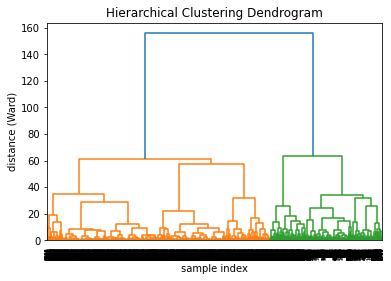

In [53]:
from matplotlib import pyplot as plt
dendro=dendrogram(link_mat)
plt.title('Hierarchical Clustering Dendrogram')

# Plot axis labels
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')


plt.show()

let us cal the cophenetic correlation coff

In [54]:
from sklearn.metrics.pairwise import euclidean_distances

In [55]:
eucli_dist= euclidean_distances(features_scaled)

In [56]:
dist_array=eucli_dist[np.triu_indices(5192,k=1)]

In [57]:
coeff,cophnet_dist= cophenet(link_mat,dist_array)
print(coeff)

0.7772274556460057


silhoutte method

In [59]:
k=[2,3,4,5,6]
from sklearn.metrics import silhouette_score
sil_scores=[]
for i in k:
    model=AgglomerativeClustering(n_clusters=i)
    sil_scores.append(silhouette_score(features_scaled,model.fit_predict(features_scaled)))

<AxesSubplot:>

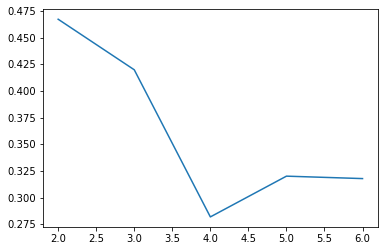

In [60]:
import seaborn as sns
sns.lineplot(x=k,y=sil_scores)

Retrive the clusters

In [61]:
clusters=AgglomerativeClustering(n_clusters=2,linkage='ward')

clusters.fit(features_scaled)

AgglomerativeClustering()

In [62]:
df['Cluster num']=clusters.labels_

In [63]:
df.head()

,Cust_id,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Customer_Segment,Cluster num
0,Cust_1088,10909.641,40,2616.46,22.00,0.57,HOME OFFICE,0
1,Cust_1820,10607.641,27,2977.36,23.69,0.56,CORPORATE,0
2,Cust_1659,754.641,13,29.80,8.90,0.37,SMALL BUSINESS,1
3,Cust_622,572.641,22,92.78,10.99,0.39,SMALL BUSINESS,1
4,Cust_564,10128.641,50,5133.68,20.50,0.36,SMALL BUSINESS,0


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

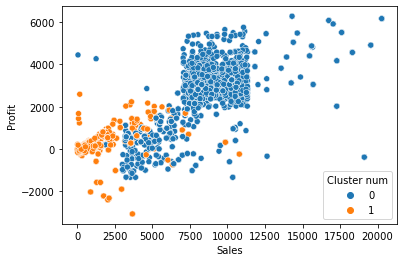

In [65]:
sns.scatterplot(x='Sales',y='Profit',data=df,hue='Cluster num')

# DBScan

In [66]:
from sklearn.cluster import DBSCAN

In [68]:
model=DBSCAN(eps=0.8,min_samples=15)

In [69]:
model.fit(features_scaled)

DBSCAN(eps=0.8, min_samples=15)

In [70]:
set(model.labels_)

{-1, 0, 1, 2}

In [72]:
df['Cluster num from DBScan']=model.labels_

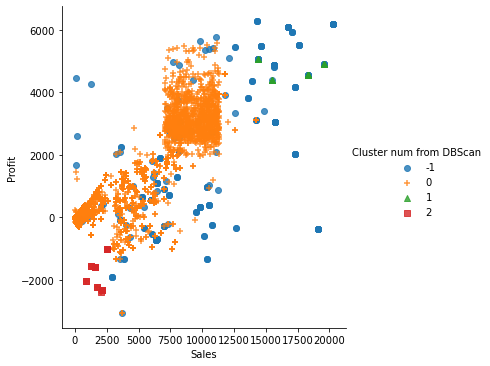

In [77]:
sns.lmplot(data=df,hue='Cluster num from DBScan',x='Sales',y='Profit',markers= ['o','+','^',','],fit_reg = False)